In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import pandas as pd 
data = pd.read_csv("/content/drive/MyDrive/Personal Storage/Project/Dicoding ML DEVELOPER/dataset/Salary_Data.csv")

import numpy as np 
X = data["YearsExperience"]
y = data["Salary"]

X = X[:,np.newaxis]

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

model = SVR()
parameters = {
    'kernel' :['rbf'], 
    'C' : [1000,10000,100000],
    'gamma' : [0.5, 0.05, 0,.005] 
}

grid_search = GridSearchCV(model, parameters)
grid_search.fit(X,y)

print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


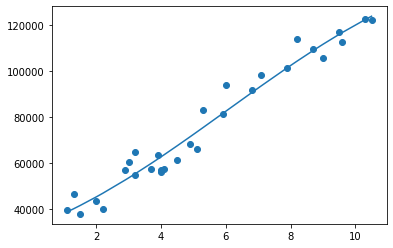

In [ ]:
new_model = SVR(C=100000, gamma= 0.005, kernel='rbf')
new_model.fit(X,y)

import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X,new_model.predict(X))

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-07-27 19:10:48--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  4.96MB/s    in 14s     

2021-07-27 19:11:03 (4.80 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [ ]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [ ]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')
 
# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 20 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [53]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 8s - loss: 0.7447 - accuracy: 0.5400 - val_loss: 0.6748 - val_accuracy: 0.7000
Epoch 2/20
25/25 - 7s - loss: 0.6939 - accuracy: 0.5300 - val_loss: 0.6900 - val_accuracy: 0.6500
Epoch 3/20
25/25 - 7s - loss: 0.6896 - accuracy: 0.5600 - val_loss: 0.6385 - val_accuracy: 0.6500
Epoch 4/20
25/25 - 7s - loss: 0.6869 - accuracy: 0.6200 - val_loss: 0.7910 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 7s - loss: 0.6819 - accuracy: 0.6000 - val_loss: 0.7350 - val_accuracy: 0.5000
Epoch 6/20
25/25 - 7s - loss: 0.7119 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.6500
Epoch 7/20
25/25 - 7s - loss: 0.6855 - accuracy: 0.6400 - val_loss: 0.6995 - val_accuracy: 0.5000
Epoch 8/20
25/25 - 7s - loss: 0.6876 - accuracy: 0.5200 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 9/20
25/25 - 7s - loss: 0.6894 - accuracy: 0.4900 - val_loss: 0.6638 - val_accuracy: 0.8500
Epoch 10/20
25/25 - 7s - loss: 0.6965 - accuracy: 0.5600 - val_loss: 0.6987 - val_accuracy: 0.5000
Epoch 11/20
25/25 -

Saving room.jpg to room.jpg
room.jpg
clean


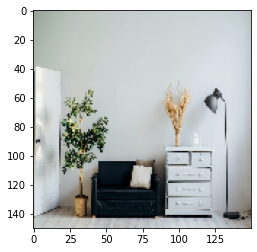

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')